In [8]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Importing netflix dataset csv using Pandas

df=pd.read_csv('F:/Jupyter Notebook DATA/netflix_dataset.csv')

In [11]:
# Printing shape of the dataset

print(df.shape)

(7787, 12)


In [12]:
# Describe the dataset

print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


In [13]:
# Datatype of each column

print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [14]:
# Number of NA(null) values in each column

print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [17]:
# Remove NA(null) values
# NumPy NAN(np.nan) stands for not a number and is defined as a substitute for declaring value which are numerical values that are missing values in an array as NumPy is used to deal with arrays in Python and this can be initialized using numpy.

# For 'cast' and 'director' columns, replace NA values with 'No Data'.

df['cast']=df['cast'].replace(np.nan, 'No data')
df['director']=df['director'].replace(np.nan, 'No data')

# Replace 'country', 'date_added' and 'rating' with the mode of the column.

# Pandas treats the mode as something special. Since they can be unimodal, bimodal or multimodal distributions, they had to make sure more than 1 value could be returned. if you go to the official documentation of pandas it states: "Always returns Series even if only one value is returned".
# The default value of this attribute is False and it returns the copy of the object while True returns only updated value not copy.

df['country'].fillna(df['country'].mode()[0], inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)


print(df.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [19]:
# print first 5 rows of dataset

print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%            No data   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [20]:
# In "type" column there are two values

x=df["type"].value_counts().reset_index()
print(x)

     index  type
0    Movie  5377
1  TV Show  2410


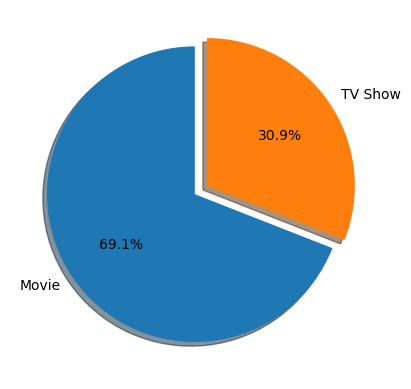

In [21]:
# Create a pie chart showing the percentage of TV shows and Movies.

plt.pie(x["type"], labels = x["index"], autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90)
plt.show()


In [22]:
# Print the output in the form of a tuple. (till one decimal point)

print((69.1, 30.9))

(69.1, 30.9)


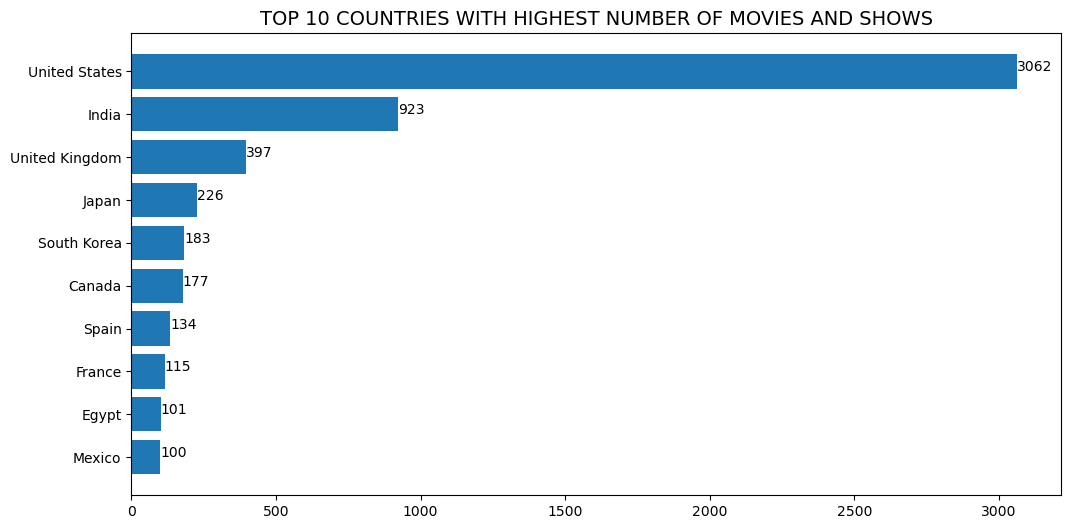

In [24]:
# Using the bar plot, show the top 10 countries with the most content.

countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
plt.barh(countries["country"], countries["type"])
for index, value in enumerate(countries["type"]):
    plt.text(value, index, str(value))

plt.title("TOP 10 COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=14)
plt.show()

In [25]:
# print a tuple containing the name of the country having the highest number of content and the total number of movies and tv shows.

print(("United States", 3062))

('United States', 3062)


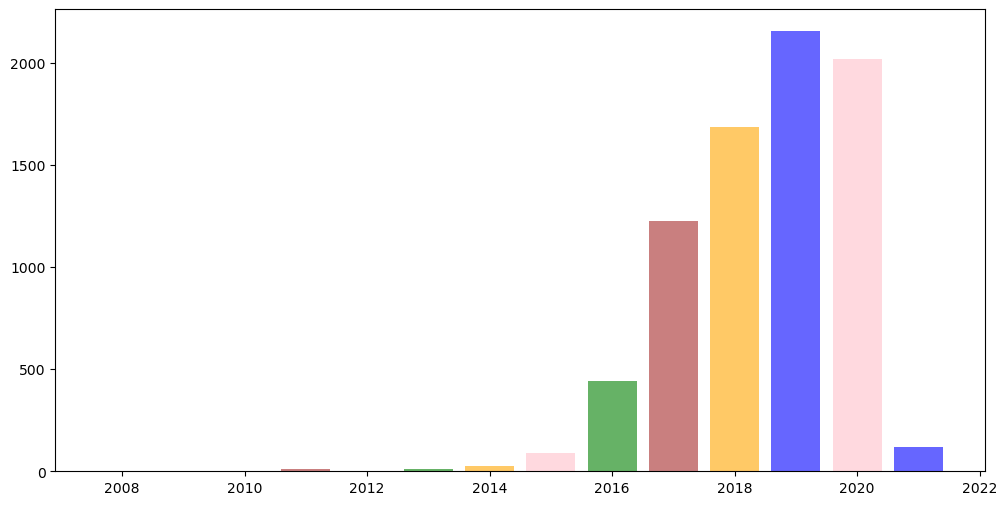

In [26]:
# Content Added Over Years

df["date_added"]=pd.DatetimeIndex(df.date_added)
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

year_count = df["year"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(year_count.index, year_count.values, color=['blue', 'pink', 'orange', 'brown', 'green'], alpha=0.6)
plt.show()


In [27]:
# year having most content added

print(2019)

2019


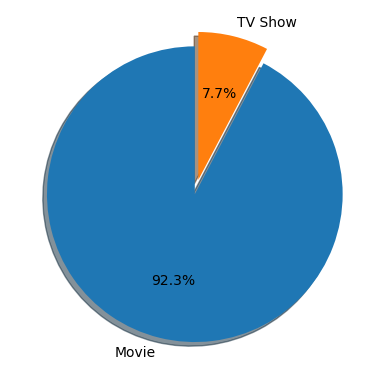

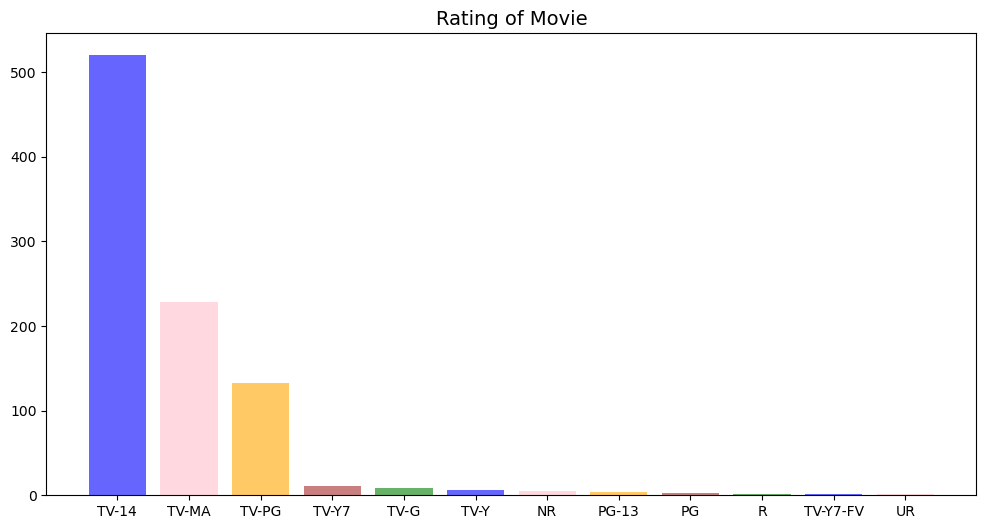

In [28]:
# Most Popular in India

india_data=df.query('country=="India"')

x=india_data["type"].value_counts().reset_index()
plt.pie(x["type"], labels = x["index"], autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90)
plt.show()

year_count=india_data["rating"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(year_count.index, year_count.values, color=['blue', 'pink', 'orange', 'brown', 'green'], alpha=0.6)
plt.title("Rating of Movie", fontsize=14)
plt.show()

In [29]:
print(("Movies","TV-14"))

('Movies', 'TV-14')


In [30]:
# Longest Movie Duration

df_movies=df.query('type=="Movie"')
df_movies["duration"]=df_movies["duration"].apply(lambda x: int(x.split(" ")[0]))
df_movies.loc[df_movies["duration"].idxmax()]

C:\Users\m973s\AppData\Local\Temp\ipykernel_428\289719552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration"]=df_movies["duration"].apply(lambda x: int(x.split(" ")[0]))


show_id                                                      s958
type                                                        Movie
title                                  Black Mirror: Bandersnatch
director                                                  No data
cast            Fionn Whitehead, Will Poulter, Craig Parkinson...
country                                             United States
date_added                                    2018-12-28 00:00:00
release_year                                                 2018
rating                                                      TV-MA
duration                                                      312
listed_in          Dramas, International Movies, Sci-Fi & Fantasy
description     In 1984, a young programmer begins to question...
year                                                         2018
month                                                          12
Name: 957, dtype: object

In [31]:
print(("Black Mirror: Bandersnatch", 2018))

('Black Mirror: Bandersnatch', 2018)
